In [38]:
import matplotlib.pyplot as plt
import pesummary
from pesummary.io import read
import h5py
import numpy as np
import corner
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro, normaltest, anderson
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [39]:
file_name = "../data/IGWN-GWTC3p0-v1-GW200112_155838_PEDataRelease_mixed_cosmo.h5"
with h5py.File(file_name, "r") as f:
    print("H5 data sets:")
    print(list(f))
data = read(file_name)
samples_dict = data.samples_dict
psIMR, psM, psSEO = samples_dict["C01:IMRPhenomXPHM"], samples_dict["C01:Mixed"], samples_dict["C01:SEOBNRv4PHM"]
pI, pM, pS = psIMR.parameters, psM.parameters, psSEO.parameters
len(pI), len(pM), len(pS)

H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']


2022-10-18  10:27:39 PESummary WARNING : Could not find f_final in input file and one was not passed from the command line. Using 1024.0Hz as default
2022-10-18  10:27:39 PESummary WARNING : Could not find delta_f in input file and one was not passed from the command line. Using 0.00390625Hz as default
2022-10-18  10:27:39 PESummary WARNING : Could not find minimum frequency in input file and one was not passed from the command line. Using 20.0Hz as default
/home/shubh/anaconda3/envs/gw/lib/python3.10/site-packages/pesummary/utils/dict.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.samples = np.array(_samples)


(137, 58, 62)

In [53]:
with h5py.File(file_name, "r") as f:
    print("H5 data sets:")
    print((f["C01:IMRPhenomXPHM"]["posterior_samples"][0]))
    print(list(f["C01:IMRPhenomXPHM"]["meta_data"]["meta_data"]))

H5 data sets:
(32.26332801, 0.94369318, 0.40770666, 0.45320083, 1.09185835, 2.4696375, 3.0862269, 1.36338892, 2.71825453, 1.2033711, 3.60020654, 2.40041055, 2.33815483, 0.0129176, -0.01666316, -0.0259399, 0.00782209, -0.01547031, -0.01070808, 0.03561779, -0.00118685, -0.01157035, 0.00735029, -0.0002105, -0.02336779, -0.15104195, -0.0522802, 0.01171341, 0.00729607, 0.00458259, 0.01978009, -0.00685391, 0.01422972, -0.00721326, 0.02520751, 0.00514473, -0.00886055, -0.01439223, 0.02846609, 0.01671934, 0.03618957, -0.06974204, -0.01665582, 0.02826135, -0.00126606, 0.01309021, 0.05132031, -0.00063484, -0.01570253, 0.03062451, 0.04298847, -0.00244783, -0.0384612, -0.00038488, 1398.74306349, 1.26287994e+09, 20., 30.51443482, 46.55653663, 71.03232014, 108.37555517, 165.35094074, 252.27952522, 384.9083565, 587.26304789, 896., 20., 30.51443482, 46.55653663, 71.03232014, 108.37555517, 165.35094074, 252.27952522, 384.9083565, 587.26304789, 896., 176.94712502, 77.47382572, 74.15901055, 38.15366103, 

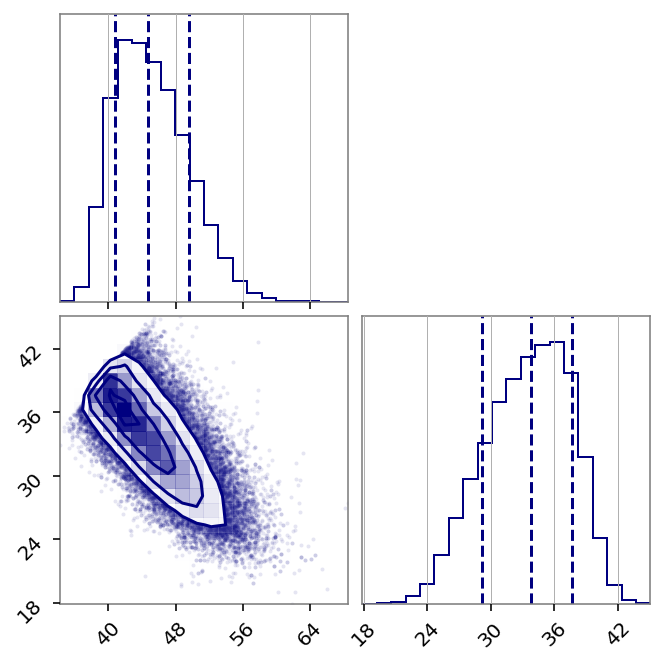

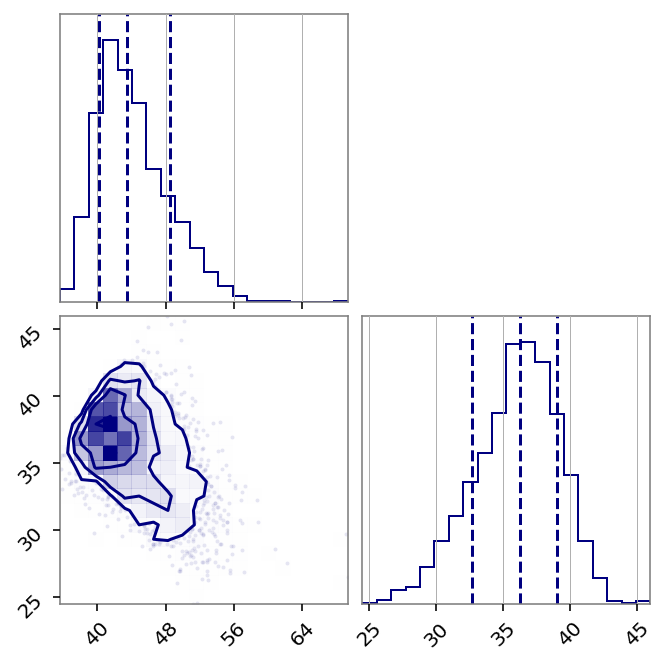

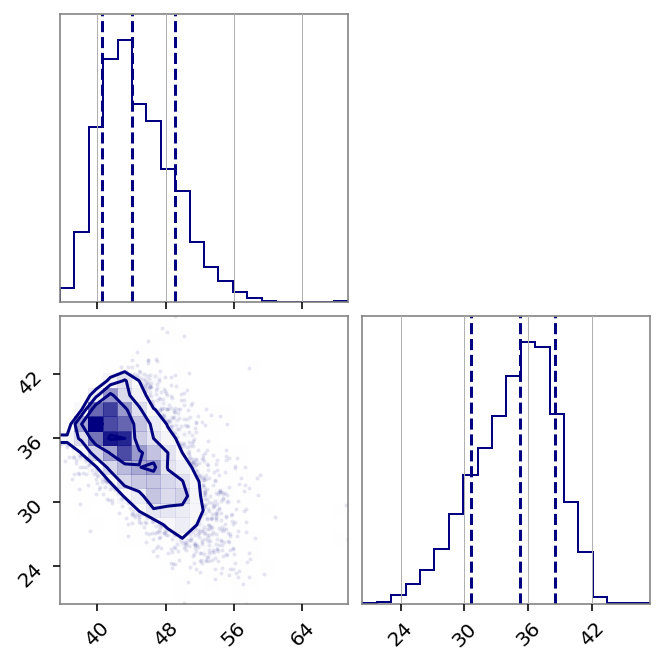

In [20]:
def get_corner(*vals):
    fig = corner.corner(np.vstack(vals).T, quantiles=[0.16, 0.5, 0.84], color="navy")
get_corner(psIMR["mass_1"], psIMR["mass_2"])
get_corner(psSEO["mass_1"], psSEO["mass_2"])
get_corner(psM["mass_1"], psM["mass_2"])

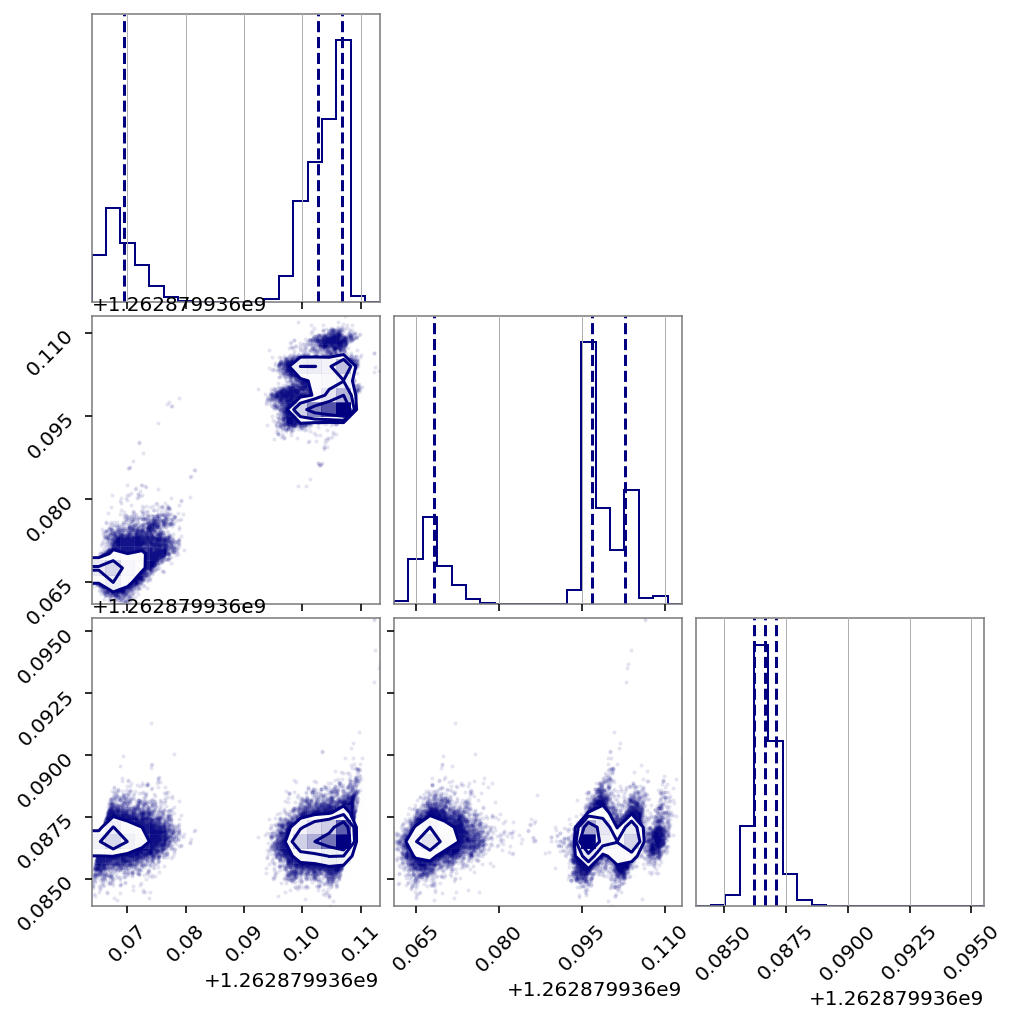

In [27]:
get_corner(psIMR["geocent_time"], psIMR["V1_time"], psIMR["L1_time"])

In [37]:
psSEO.parameters

['mass_1',
 'mass_2',
 'spin_1x',
 'spin_1y',
 'spin_1z',
 'spin_2x',
 'spin_2y',
 'spin_2z',
 'chirp_mass',
 'symmetric_mass_ratio',
 'ra',
 'dec',
 'phase',
 'iota',
 'psi',
 'luminosity_distance',
 'Npts',
 'log_likelihood',
 'p',
 'ps',
 'neff',
 'total_mass',
 'mass_ratio',
 'chi_eff',
 'chi_p',
 'tilt_1',
 'tilt_2',
 'phi_12',
 'theta_jn',
 'phi_jl',
 'redshift',
 'comoving_distance',
 'inverted_mass_ratio',
 'mass_1_source',
 'mass_2_source',
 'total_mass_source',
 'chirp_mass_source',
 'a_1',
 'a_2',
 'phi_1',
 'phi_2',
 'tilt_1_infinity_only_prec_avg',
 'tilt_2_infinity_only_prec_avg',
 'chi_p_2spin',
 'spin_1z_infinity_only_prec_avg',
 'spin_2z_infinity_only_prec_avg',
 'chi_eff_infinity_only_prec_avg',
 'chi_p_infinity_only_prec_avg',
 'beta',
 'psi_J',
 'final_spin',
 'peak_luminosity',
 'final_mass',
 'cos_tilt_1_infinity_only_prec_avg',
 'cos_tilt_2_infinity_only_prec_avg',
 'cos_tilt_1',
 'cos_tilt_2',
 'final_mass_source',
 'radiated_energy',
 'cos_theta_jn',
 'viewing_